# Heart Failure Prediction: Classification models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_failure_clinical_records.csv')

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


<Axes: >

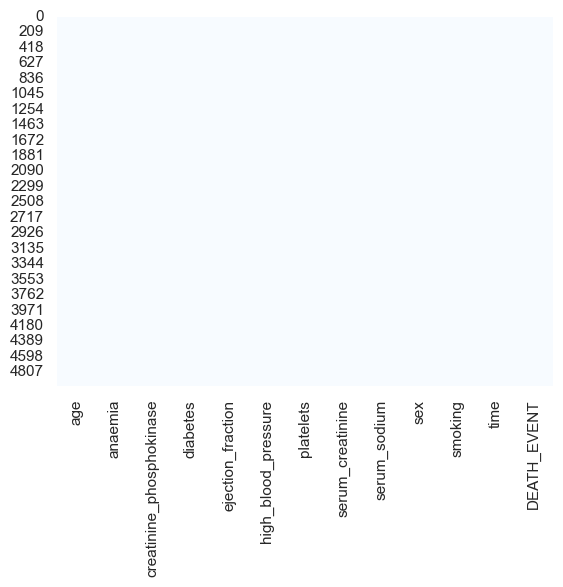

In [7]:
sns.heatmap(df.isna(), cbar=None, cmap='Blues')

In [8]:
print(f'There are {df.isna().sum().sum()} missing values in the dataset.')

There are 0 missing values in the dataset.


In [9]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
18,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
51,45.0,0,308,0,40,1,51000.0,1.3,136,1,1,186,0
58,60.0,0,582,0,40,0,242000.0,3.7,134,1,0,96,1
65,60.0,0,582,0,40,0,242000.0,3.7,134,1,0,96,1
81,45.0,0,615,1,55,0,236000.0,0.8,141,0,0,257,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1


In [10]:
print(f'There are {df.duplicated().sum()} duplicates in the dataset.')

There are 3680 duplicates in the dataset.


<Axes: xlabel='time', ylabel='Count'>

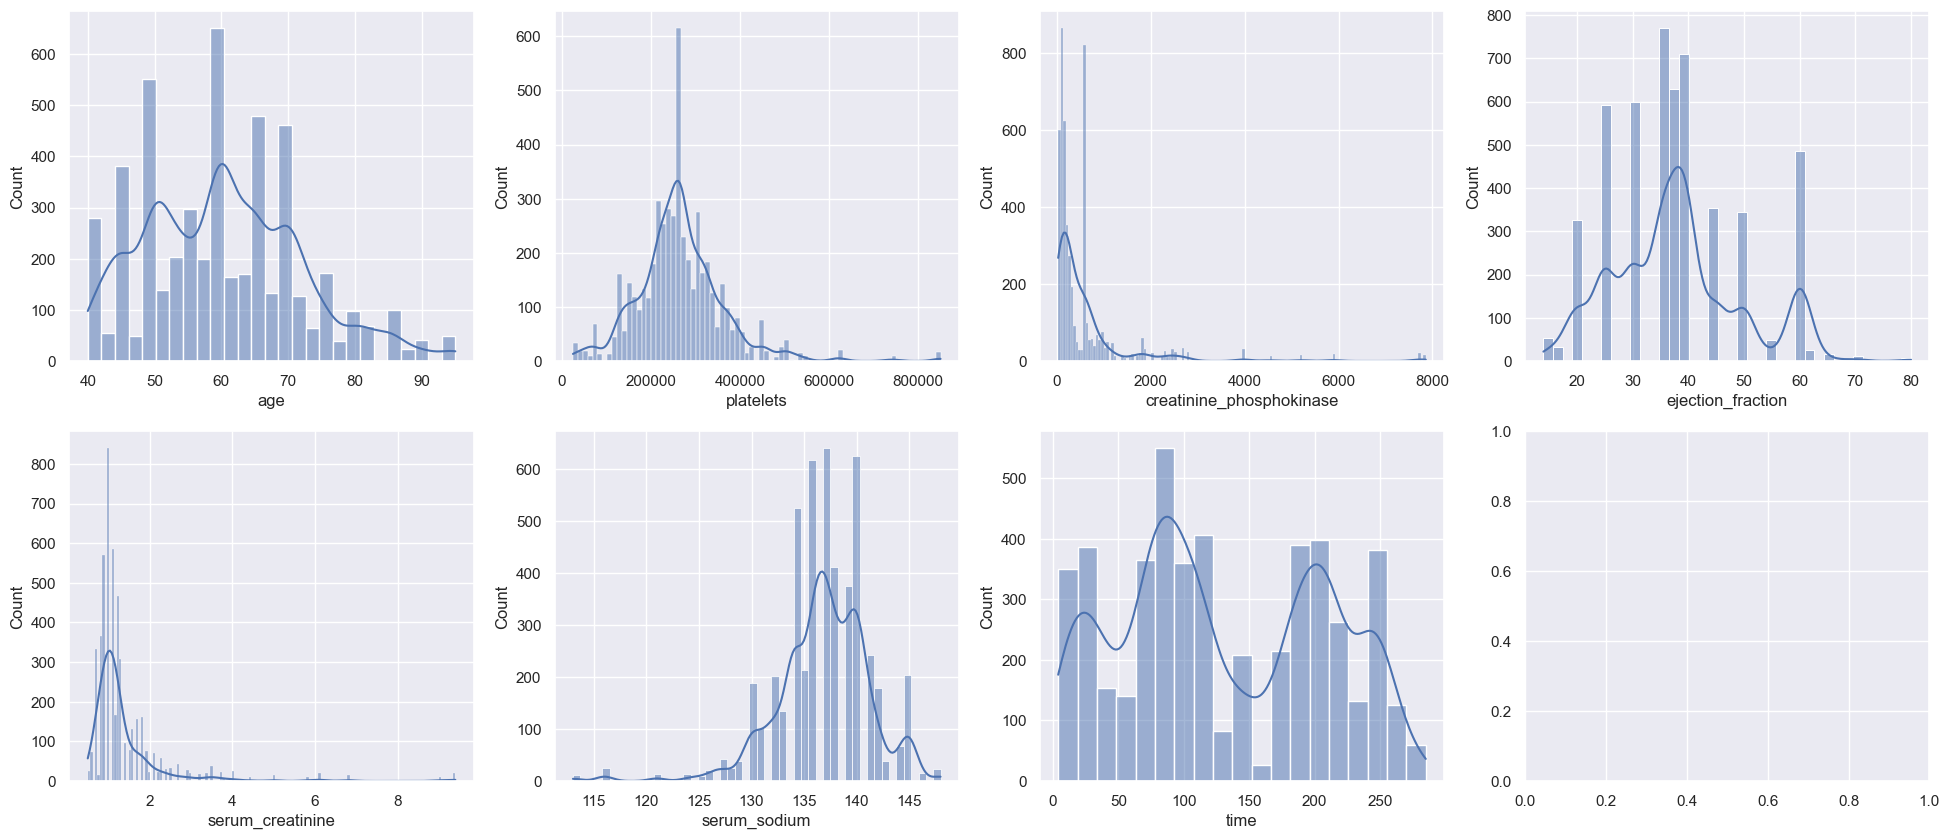

In [11]:
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

fig, axes = plt.subplots(2, 4, figsize=(24,10))
sns.histplot(data=df, x='age', kde=True, ax=axes[0,0])
sns.histplot(data=df, x='platelets', kde=True, ax=axes[0,1])
sns.histplot(data=df, x='creatinine_phosphokinase', kde=True, ax=axes[0,2])
sns.histplot(data=df, x='ejection_fraction', kde=True, ax=axes[0,3])
sns.histplot(data=df, x='serum_creatinine', kde=True, ax=axes[1,0])
sns.histplot(data=df, x='serum_sodium', kde=True, ax=axes[1,1])
sns.histplot(data=df, x='time', kde=True, ax=axes[1,2])

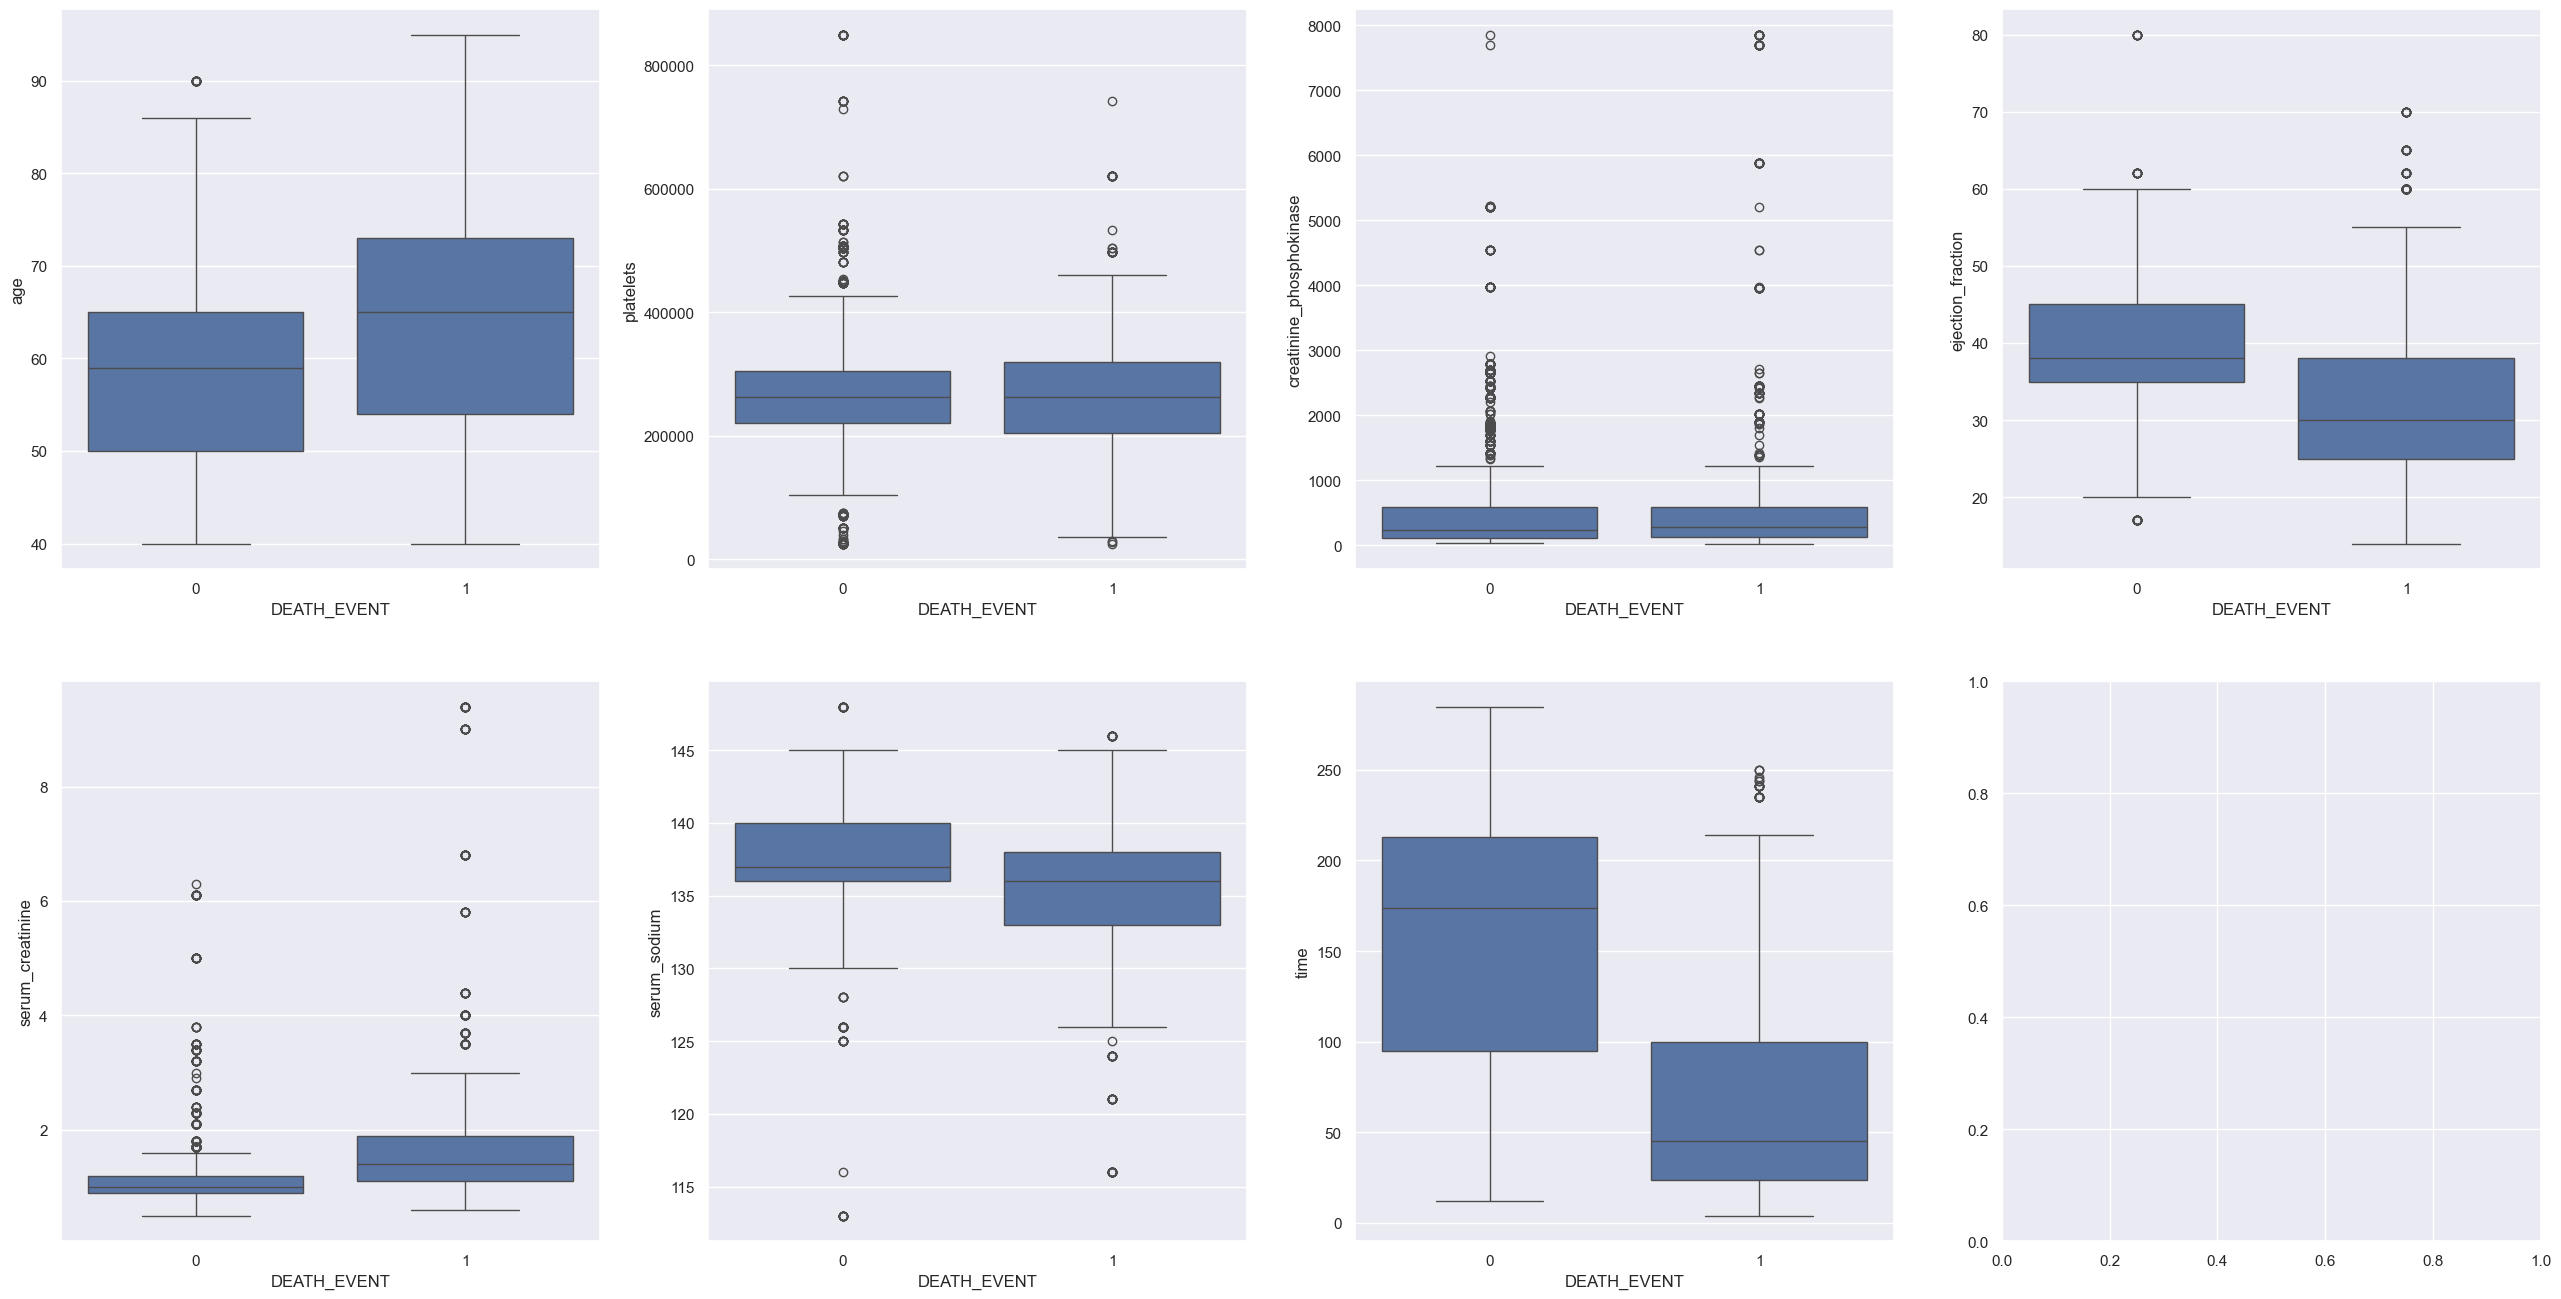

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(32,16))
sns.boxplot(data=df, x='DEATH_EVENT', y='age', ax=axes[0,0])
sns.boxplot(data=df, x='DEATH_EVENT', y='platelets', ax=axes[0,1])
sns.boxplot(data=df, x='DEATH_EVENT', y='creatinine_phosphokinase', ax=axes[0,2])
sns.boxplot(data=df, x='DEATH_EVENT', y='ejection_fraction', ax=axes[0,3])
sns.boxplot(data=df, x='DEATH_EVENT', y='serum_creatinine', ax=axes[1,0])
sns.boxplot(data=df, x='DEATH_EVENT', y='serum_sodium', ax=axes[1,1])
sns.boxplot(data=df, x='DEATH_EVENT', y='time', ax=axes[1,2])
plt.show()

<Axes: title={'center': 'DEATH_EVENT'}, ylabel='count'>

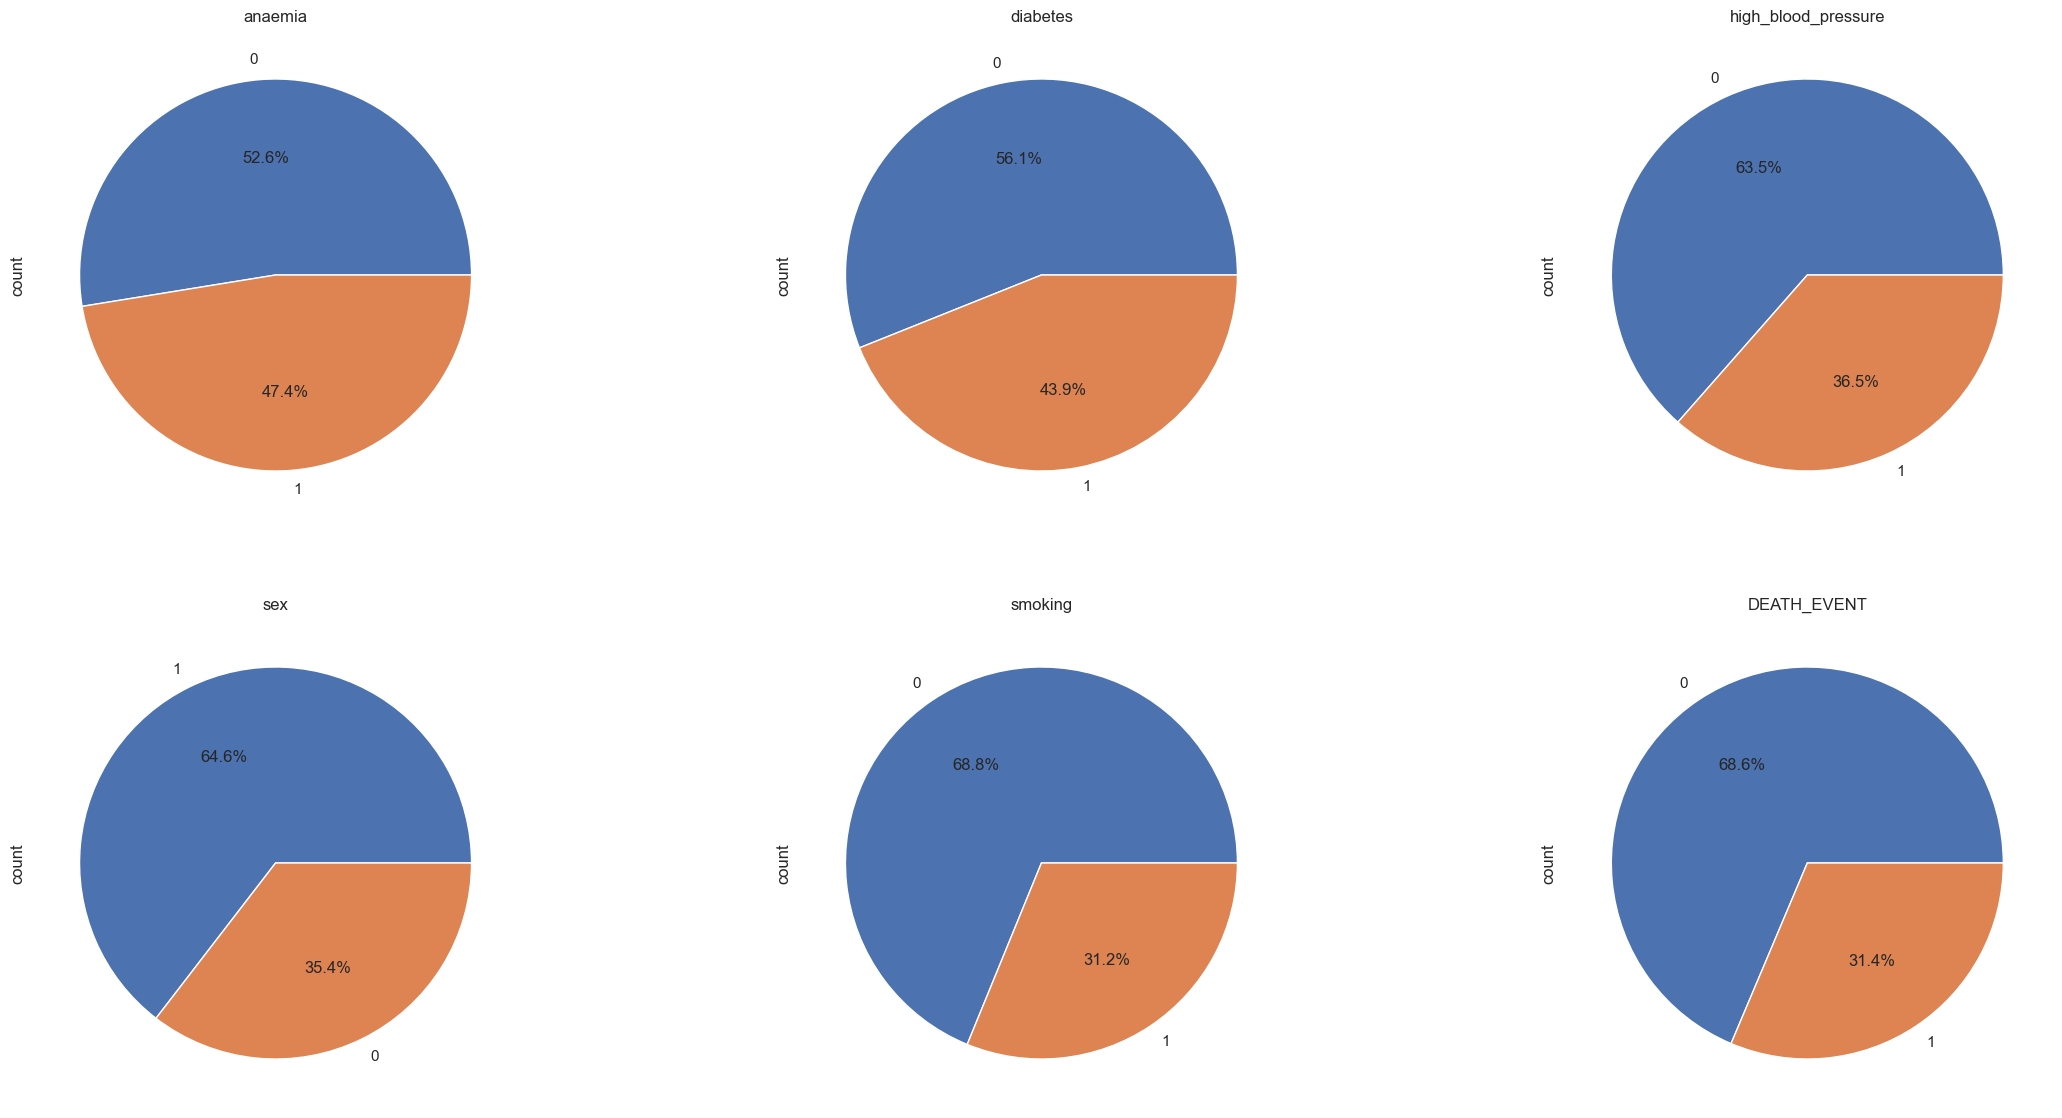

In [13]:
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

fig, axes = plt.subplots(2, 3, figsize=(28,14))

df['anaemia'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0,0], title='anaemia')
df['diabetes'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0,1], title='diabetes')
df['high_blood_pressure'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0,2], title='high_blood_pressure')
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1,0], title='sex')
df['smoking'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1,1], title='smoking')
df['DEATH_EVENT'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1,2], title='DEATH_EVENT')

In [14]:
df.corr()[:-1]['DEATH_EVENT']

age                         0.249442
anaemia                     0.054508
creatinine_phosphokinase    0.079706
diabetes                   -0.011273
ejection_fraction          -0.292702
high_blood_pressure         0.094023
platelets                  -0.031521
serum_creatinine            0.311281
serum_sodium               -0.227355
sex                         0.055604
smoking                     0.009397
time                       -0.527234
Name: DEATH_EVENT, dtype: float64

<Axes: >

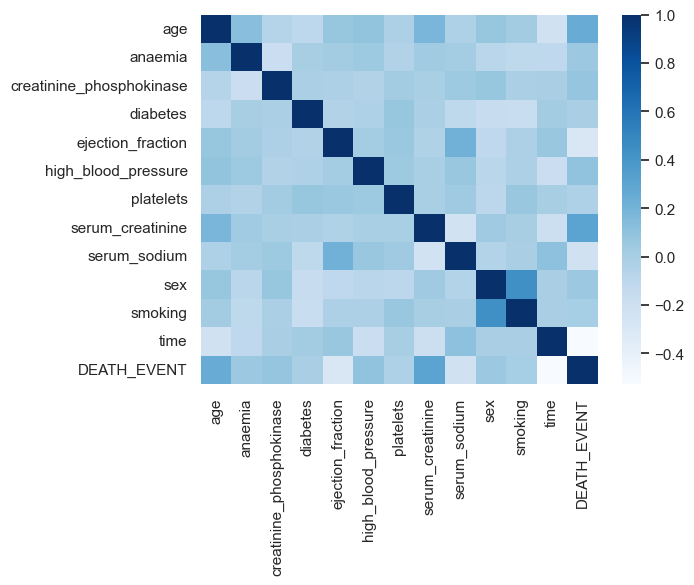

In [15]:
sns.heatmap(df.corr(), cmap='Blues')

<Axes: xlabel='smoking', ylabel='sex'>

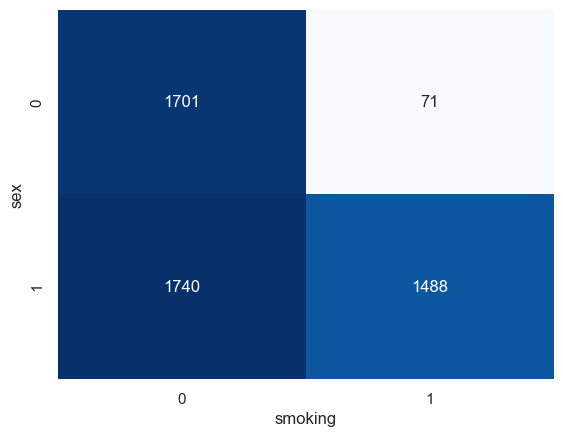

In [16]:
sns.heatmap(pd.crosstab(df['sex'], df['smoking']), cmap='Blues', cbar=None, annot=True, fmt='d')

In [17]:
df.iloc[:,:-1].skew()

age                         0.450812
anaemia                     0.102565
creatinine_phosphokinase    4.403444
diabetes                    0.244274
ejection_fraction           0.494405
high_blood_pressure         0.561894
platelets                   1.157117
serum_creatinine            4.615903
serum_sodium               -0.997975
sex                        -0.608966
smoking                     0.812802
time                        0.114989
dtype: float64

## Data Preprocessing

In [18]:
df1 = df.copy()

print(f'Before cleaning, there are {df1.shape[0]} observations and {df1.shape[1]} features.')

#df1.drop_duplicates(inplace=True)
#df1.reset_index(drop=True, inplace=True)

print(f'After cleaning, there are {df1.shape[0]} observations and {df1.shape[1]} features.')

Before cleaning, there are 5000 observations and 13 features.
After cleaning, there are 5000 observations and 13 features.


In [19]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [20]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (3500, 12), y_train: (3500,)


In [21]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (1500, 12), y_test: (1500,)


In [22]:
def results(y_pred):
    """
    Input:
        - y_pred: 1D-array containing predictions 
    Output:
        - results: dictionnary containing the metrics from predictions
        
    Returns metrics (accuracy, precision, recall, f1 and roc auc scores) from predictions
    """
    results = {}
    
    results['accuracy'] = accuracy_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['recall'] = recall_score(y_test, y_pred)
    results['f1_score'] = f1_score(y_test, y_pred)
    results['roc_auc_score'] = roc_auc_score(y_test, y_pred)
    
    return pd.Series(results)

## Modeling

In [23]:
models = {}
metrics = {}
random_state = 42

models['LogisticRegression'] = LogisticRegression(random_state=random_state)
models['RandomForestClassifier'] = RandomForestClassifier(random_state=random_state)
models['GradientBoostingClassifier'] = GradientBoostingClassifier(random_state=random_state)

y_preds = {}

for model_name, base_model in models.items():
    base_model.fit(X_train, y_train)
    y_preds[model_name] = base_model.predict(X_test)
    metrics[model_name] = results(y_preds[model_name])
    
metrics = pd.DataFrame(metrics)
metrics

,LogisticRegression,RandomForestClassifier,GradientBoostingClassifier
accuracy,0.822667,0.991333,0.972667
precision,0.735437,0.989059,0.966592
recall,0.658696,0.982609,0.943478
f1_score,0.694954,0.985823,0.954895
roc_auc_score,0.776944,0.988901,0.964528


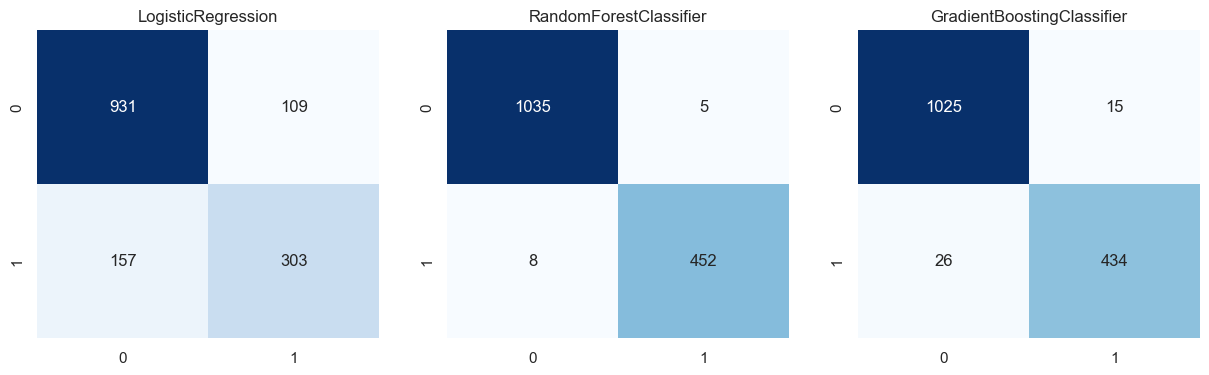

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

for model_name, base_model in models.items():
    sns.heatmap(confusion_matrix(y_test, base_model.predict(X_test)), cmap='Blues', cbar=None, annot=True, fmt='d', ax=axes[list(models.keys()).index(model_name)])
    axes[list(models.keys()).index(model_name)].set_title(model_name)

## Feature Selection

<Axes: title={'center': 'Feature importances for RandomForestClassifier'}>

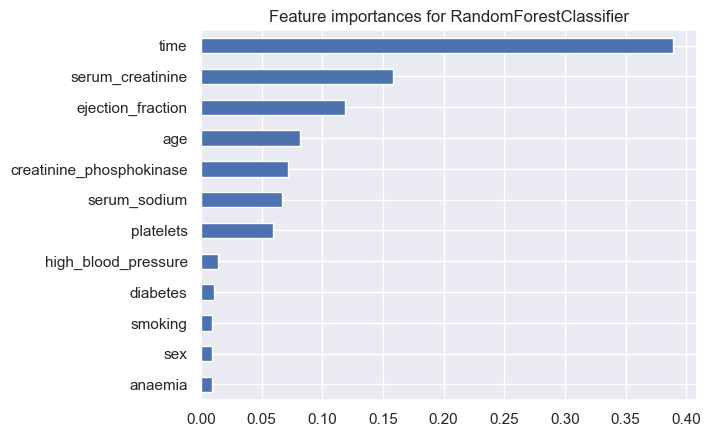

In [25]:
feature_importances = pd.Series(models['RandomForestClassifier'].feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', title='Feature importances for RandomForestClassifier')

## Hyperparameters Tuning

In [26]:
kf = KFold(shuffle=True, random_state=random_state, n_splits=5)
skb = SelectKBest()
pf = PolynomialFeatures()
rfc = RandomForestClassifier(random_state=random_state)

pipeline = Pipeline([
    ('selectkbest', skb),
    ('polynomialfeatures', pf),
    ('rfc', rfc)
])

param_grid = {
    'selectkbest__k' : [7, 8],
    'polynomialfeatures__degree' : [1, 2, 3],
    'rfc__n_estimators': [50, 100, 150],
    'rfc__max_depth' : [None, 10, 20],
    'rfc__min_samples_split' : [2, 5, 10],
}

grid = GridSearchCV(pipeline, param_grid, cv=kf, n_jobs=-1, scoring='recall')

In [27]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selectkbest', SelectKBest()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'rfc__max_depth': [None, 10, 20],
                         'rfc__min_samples_split': [2, 5, 10],
                         'rfc__n_estimators': [50, 100, 150],
                         'selectkbest__k': [7, 8]},
             scoring='recall')

In [28]:
print(f'The mean recall score on cross-validation (5 splits) is {round(grid.best_score_*100,2)}%.')

The mean recall score on cross-validation (5 splits) is 98.18%.


In [29]:
grid.best_params_

{'polynomialfeatures__degree': 1,
 'rfc__max_depth': None,
 'rfc__min_samples_split': 5,
 'rfc__n_estimators': 50,
 'selectkbest__k': 7}

In [30]:
results(grid.best_estimator_.predict(X_test))

accuracy         0.988667
precision        0.986813
recall           0.976087
f1_score         0.981421
roc_auc_score    0.985159
dtype: float64

<Axes: >

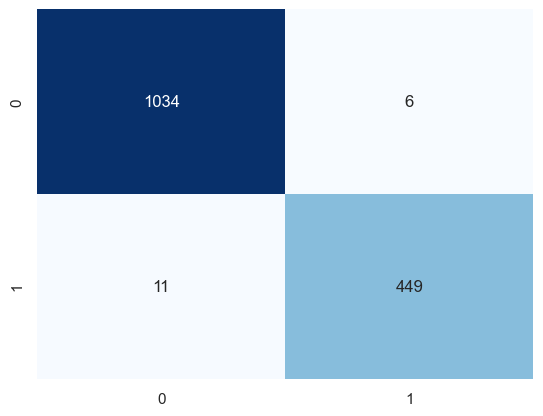

In [31]:
sns.heatmap(confusion_matrix(y_test, grid.best_estimator_.predict(X_test)), cmap='Blues', cbar=None, annot=True, fmt='d')